In [1]:
import pandas as pd

In [2]:
# kiwoom df 불러오기
kiwoom = pd.read_csv('./Data/kiwom_test.csv')
# kiwoom['시작시간2'] = kiwoom['시작시간'].str[:3] + '00'

# json 파일 불러와 dict로 변경
dict_weather = pd.read_json('./Data/result_dict.json').to_dict()

In [3]:
kiwoom = pd.read_csv('./Data/kiwom_test.csv')
# 날씨의 시간정보와 kiwoom의 시간정보 형식을 맞추기
kiwoom['시작시간2'] = kiwoom['시작시간'].str[:3] + '00'

dict_weather = pd.read_json('./Data/result_dict.json').to_dict()

for time in kiwoom.날짜 :
    # time의 시간별(12:00 ~ 19:00) 날씨 DataFrame
    weather_df = pd.DataFrame(dict_weather[pd.to_datetime(time)])

    # (time(날짜)에서의 키움경기 시작시간 == 날씨 DataFrame의 시간)인 경우의 날씨 DataFrame
    merge_weather_df = weather_df[kiwoom[kiwoom.날짜 == time].시작시간2.values[0] == weather_df['시간'].str[11:]]

    kiwoom.loc[kiwoom.날짜 == time, merge_weather_df.columns] = merge_weather_df.values[0]

In [4]:
kiwoom.drop(columns=['시작시간2', '시간', '위치'], inplace=True)

In [5]:
kiwoom.현상번호 = kiwoom.현상번호.astype(int)

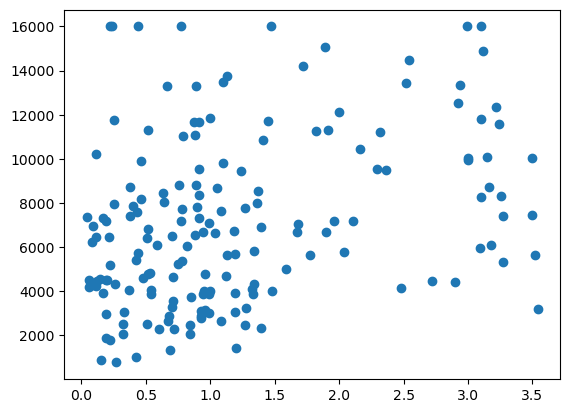

In [6]:
import matplotlib.pyplot as plt

plt.scatter(
    data=kiwoom,
    x='일사',
    y='관중 수'
)

In [7]:
kiwoom.일사 = (kiwoom.일사 - kiwoom.일사.min()) / (kiwoom.일사.max() - kiwoom.일사.min())

In [8]:
kiwoom.corr(numeric_only=True)

,관중 수,기온,강수량,풍속,습도,기압,일조,일사,시정,현상번호
관중 수,1.000000,0.130653,-0.013113,-0.060937,-0.077848,0.105053,0.174704,0.338600,0.096035,0.160733
기온,0.130653,1.000000,-0.001393,-0.239010,0.027063,-0.315741,0.243634,0.322657,0.090171,-0.227500
강수량,-0.013113,-0.001393,1.000000,-0.094019,0.316474,-0.187314,-0.211214,-0.182478,-0.291983,0.148108
풍속,-0.060937,-0.239010,-0.094019,1.000000,-0.170342,0.069293,0.137875,-0.010603,0.160969,0.084944
습도,-0.077848,0.027063,0.316474,-0.170342,1.000000,-0.537552,-0.654847,-0.512461,-0.468709,0.295824
기압,0.105053,-0.315741,-0.187314,0.069293,-0.537552,1.000000,0.273439,0.137705,0.236248,-0.143957
일조,0.174704,0.243634,-0.211214,0.137875,-0.654847,0.273439,1.000000,0.634432,0.280867,-0.162344
일사,0.338600,0.322657,-0.182478,-0.010603,-0.512461,0.137705,0.634432,1.000000,0.253639,-0.179856
시정,0.096035,0.090171,-0.291983,0.160969,-0.468709,0.236248,0.280867,0.253639,1.000000,-0.391472
현상번호,0.160733,-0.227500,0.148108,0.084944,0.295824,-0.143957,-0.162344,-0.179856,-0.391472,1.000000


In [9]:
kiwoom

,날짜,요일,원정팀,관중 수,시작시간,기온,강수량,풍속,습도,기압,일조,일사,시정,현상번호
0,2022-04-02,토,롯데,8257,14:00,14.0,0.0,3.6,36.0,1015.4,1.0,0.874286,2000.0,0
1,2022-04-03,일,롯데,6115,14:00,16.0,0.0,3.8,28.0,1016.7,1.0,0.897143,2000.0,0
2,2022-04-05,화,LG,2298,18:30,13.3,0.0,2.7,26.0,1009.5,0.5,0.160000,2000.0,0
3,2022-04-06,수,LG,2304,18:30,14.8,0.0,3.6,35.0,1008.7,0.9,0.194286,2000.0,0
4,2022-04-07,목,LG,2055,18:30,12.2,0.0,3.3,22.0,1006.7,1.0,0.228571,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30,24.4,0.0,2.9,49.0,1003.4,1.0,0.371429,2162.0,0
169,2024-05-23,목,NC,3897,18:30,24.1,0.0,3.8,43.0,999.4,1.0,0.368571,3665.0,0
170,2024-05-31,금,SSG,5680,18:30,21.4,0.0,5.2,45.0,999.7,0.9,0.328571,3971.0,0
171,2024-06-01,토,SSG,10462,17:00,24.5,0.0,3.9,45.0,998.7,1.0,0.605714,3308.0,0


In [10]:
kiwoom

,날짜,요일,원정팀,관중 수,시작시간,기온,강수량,풍속,습도,기압,일조,일사,시정,현상번호
0,2022-04-02,토,롯데,8257,14:00,14.0,0.0,3.6,36.0,1015.4,1.0,0.874286,2000.0,0
1,2022-04-03,일,롯데,6115,14:00,16.0,0.0,3.8,28.0,1016.7,1.0,0.897143,2000.0,0
2,2022-04-05,화,LG,2298,18:30,13.3,0.0,2.7,26.0,1009.5,0.5,0.160000,2000.0,0
3,2022-04-06,수,LG,2304,18:30,14.8,0.0,3.6,35.0,1008.7,0.9,0.194286,2000.0,0
4,2022-04-07,목,LG,2055,18:30,12.2,0.0,3.3,22.0,1006.7,1.0,0.228571,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30,24.4,0.0,2.9,49.0,1003.4,1.0,0.371429,2162.0,0
169,2024-05-23,목,NC,3897,18:30,24.1,0.0,3.8,43.0,999.4,1.0,0.368571,3665.0,0
170,2024-05-31,금,SSG,5680,18:30,21.4,0.0,5.2,45.0,999.7,0.9,0.328571,3971.0,0
171,2024-06-01,토,SSG,10462,17:00,24.5,0.0,3.9,45.0,998.7,1.0,0.605714,3308.0,0


In [11]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [12]:
import seaborn as sns

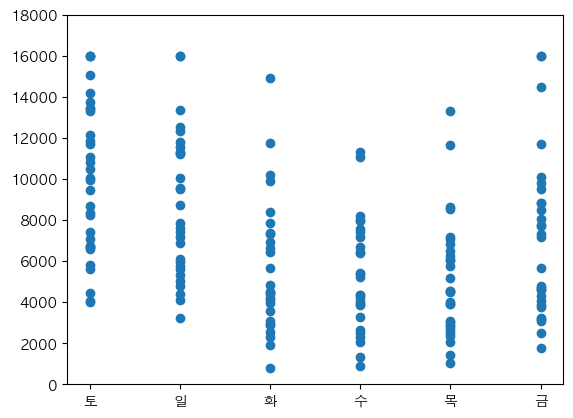

In [13]:
plt.scatter(
    kiwoom.요일,
    kiwoom['관중 수'],
    # kind='bar'
)

plt.ylim(0, 18000)

plt.show()

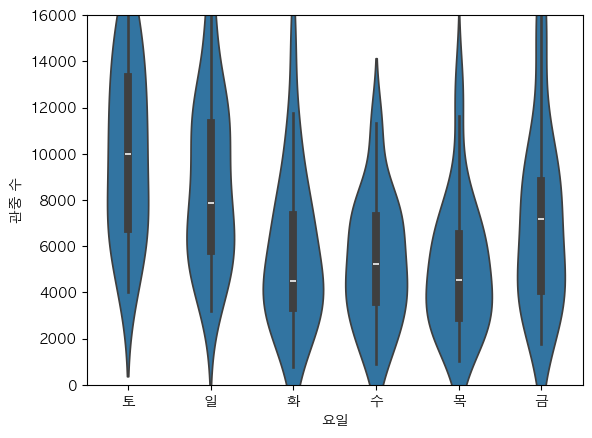

In [14]:
sns.violinplot(
    x='요일',
    y='관중 수',
    data=kiwoom
)

plt.ylim(0, 16000)

plt.show()

In [15]:
kiwoom['관중 수']

0       8257
1       6115
2       2298
3       2304
4       2055
       ...  
168     4337
169     3897
170     5680
171    10462
172     8745
Name: 관중 수, Length: 173, dtype: int64

In [16]:
kiwoom

,날짜,요일,원정팀,관중 수,시작시간,기온,강수량,풍속,습도,기압,일조,일사,시정,현상번호
0,2022-04-02,토,롯데,8257,14:00,14.0,0.0,3.6,36.0,1015.4,1.0,0.874286,2000.0,0
1,2022-04-03,일,롯데,6115,14:00,16.0,0.0,3.8,28.0,1016.7,1.0,0.897143,2000.0,0
2,2022-04-05,화,LG,2298,18:30,13.3,0.0,2.7,26.0,1009.5,0.5,0.160000,2000.0,0
3,2022-04-06,수,LG,2304,18:30,14.8,0.0,3.6,35.0,1008.7,0.9,0.194286,2000.0,0
4,2022-04-07,목,LG,2055,18:30,12.2,0.0,3.3,22.0,1006.7,1.0,0.228571,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30,24.4,0.0,2.9,49.0,1003.4,1.0,0.371429,2162.0,0
169,2024-05-23,목,NC,3897,18:30,24.1,0.0,3.8,43.0,999.4,1.0,0.368571,3665.0,0
170,2024-05-31,금,SSG,5680,18:30,21.4,0.0,5.2,45.0,999.7,0.9,0.328571,3971.0,0
171,2024-06-01,토,SSG,10462,17:00,24.5,0.0,3.9,45.0,998.7,1.0,0.605714,3308.0,0


<Axes: xlabel='날짜'>

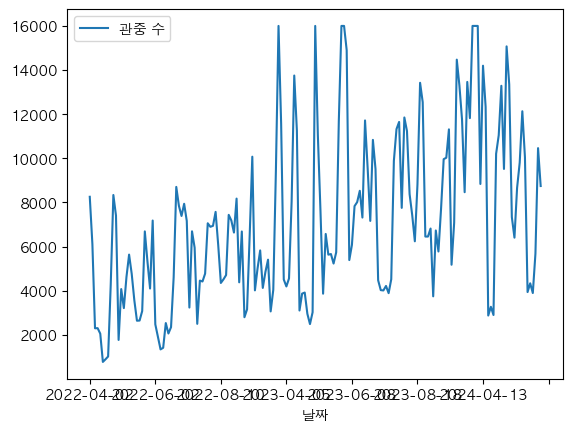

In [17]:
kiwoom.plot(
    x='날짜',
    y='관중 수'
)

<Axes: xlabel='날짜'>

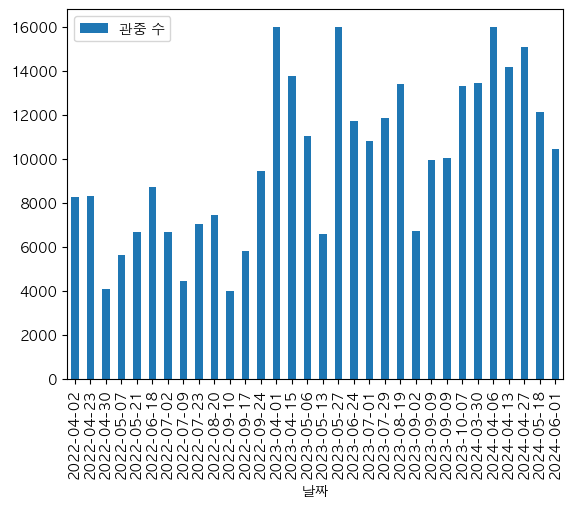

In [18]:
kiwoom[kiwoom.요일 == '토'].plot(
    kind='bar',
    y='관중 수',
    x='날짜'
)

<Axes: xlabel='시작시간'>

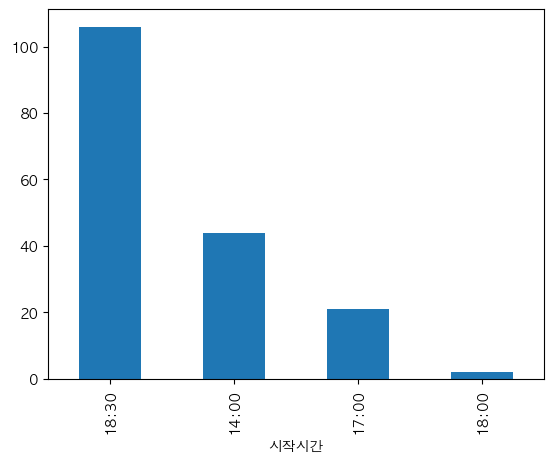

In [19]:
kiwoom.시작시간.value_counts().plot(kind='bar')

In [23]:
rank = pd.read_csv('./Data/rank/키움_rank.csv')

In [24]:
rank.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0


In [26]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          388 non-null    object 
 1   팀명          388 non-null    object 
 2   순위          388 non-null    int64  
 3   총 경기수       388 non-null    int64  
 4   승리          388 non-null    int64  
 5   패배          388 non-null    int64  
 6   무승부         388 non-null    int64  
 7   승률          388 non-null    float64
 8   게임차         388 non-null    float64
 9   최근 10경기 전적  388 non-null    object 
 10  연속 승패 현황    388 non-null    object 
 11  홈 경기 전적     388 non-null    object 
 12  원정 경기 전적    388 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 39.5+ KB


In [25]:
kiwoom.head()

,날짜,요일,원정팀,관중 수,시작시간,기온,강수량,풍속,습도,기압,일조,일사,시정,현상번호
0,2022-04-02,토,롯데,8257,14:00,14.0,0.0,3.6,36.0,1015.4,1.0,0.874286,2000.0,0
1,2022-04-03,일,롯데,6115,14:00,16.0,0.0,3.8,28.0,1016.7,1.0,0.897143,2000.0,0
2,2022-04-05,화,LG,2298,18:30,13.3,0.0,2.7,26.0,1009.5,0.5,0.160000,2000.0,0
3,2022-04-06,수,LG,2304,18:30,14.8,0.0,3.6,35.0,1008.7,0.9,0.194286,2000.0,0
4,2022-04-07,목,LG,2055,18:30,12.2,0.0,3.3,22.0,1006.7,1.0,0.228571,2000.0,0


In [30]:
kiwoom_df = pd.merge(kiwoom, rank)

In [32]:
kiwoom_df.head()

,날짜,요일,원정팀,관중 수,시작시간,기온,강수량,풍속,습도,기압,...,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적
0,2022-04-02,토,롯데,8257,14:00,14.0,0.0,3.6,36.0,1015.4,...,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0
1,2022-04-03,일,롯데,6115,14:00,16.0,0.0,3.8,28.0,1016.7,...,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0
2,2022-04-05,화,LG,2298,18:30,13.3,0.0,2.7,26.0,1009.5,...,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0
3,2022-04-06,수,LG,2304,18:30,14.8,0.0,3.6,35.0,1008.7,...,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0
4,2022-04-07,목,LG,2055,18:30,12.2,0.0,3.3,22.0,1006.7,...,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0


In [36]:
kiwoom_df = kiwoom_df.drop(columns=['원정 경기 전적', '홈 경기 전적', '최근 10경기 전적', '팀명'])

In [42]:
kiwoom_df.drop(columns=['일사', '일조', '시정', '현상번호', '강수량', '풍속', '기압'], inplace=True)

In [43]:
kiwoom_df.corr(numeric_only=True)

,관중 수,기온,습도,순위,총 경기수,승리,패배,무승부,승률,게임차
관중 수,1.000000,0.130653,-0.077848,0.313729,-0.013485,-0.111360,0.081933,0.055271,-0.144319,0.210127
기온,0.130653,1.000000,0.027063,0.056571,0.638443,0.623081,0.597837,0.605070,0.150188,0.421751
습도,-0.077848,0.027063,1.000000,0.046435,0.293675,0.294130,0.264439,0.336279,0.006722,0.169820
순위,0.313729,0.056571,0.046435,1.000000,0.160051,-0.106990,0.405036,0.301107,-0.777489,0.704335
총 경기수,-0.013485,0.638443,0.293675,0.160051,1.000000,0.955657,0.959124,0.900910,-0.007640,0.731338
승리,-0.111360,0.623081,0.294130,-0.106990,0.955657,1.000000,0.833455,0.793899,0.170219,0.507512
패배,0.081933,0.597837,0.264439,0.405036,0.959124,0.833455,1.000000,0.921214,-0.179844,0.885866
무승부,0.055271,0.605070,0.336279,0.301107,0.900910,0.793899,0.921214,1.000000,-0.099857,0.789168
승률,-0.144319,0.150188,0.006722,-0.777489,-0.007640,0.170219,-0.179844,-0.099857,1.000000,-0.417710
게임차,0.210127,0.421751,0.169820,0.704335,0.731338,0.507512,0.885866,0.789168,-0.417710,1.000000


In [47]:
kiwoom_df.head()

,날짜,요일,원정팀,관중 수,시작시간,기온,습도,순위,총 경기수,승리,패배,무승부,승률,게임차,연속 승패 현황
0,2022-04-02,토,롯데,8257,14:00,14.0,36.0,6,1,0,1,0,0.000,1.0,1패
1,2022-04-03,일,롯데,6115,14:00,16.0,28.0,4,2,1,1,0,0.500,1.0,1승
2,2022-04-05,화,LG,2298,18:30,13.3,26.0,6,3,1,2,0,0.333,2.0,1패
3,2022-04-06,수,LG,2304,18:30,14.8,35.0,7,4,1,3,0,0.250,3.0,2패
4,2022-04-07,목,LG,2055,18:30,12.2,22.0,7,5,1,4,0,0.200,4.0,3패


In [67]:
kiwoom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        173 non-null    object 
 1   요일        173 non-null    object 
 2   원정팀       173 non-null    object 
 3   관중 수      173 non-null    int64  
 4   시작시간      173 non-null    object 
 5   기온        173 non-null    float64
 6   습도        173 non-null    float64
 7   순위        173 non-null    int64  
 8   총 경기수     173 non-null    int64  
 9   승리        173 non-null    int64  
 10  패배        173 non-null    int64  
 11  무승부       173 non-null    int64  
 12  승률        173 non-null    float64
 13  게임차       173 non-null    float64
 14  연속 승패 현황  173 non-null    object 
dtypes: float64(4), int64(6), object(5)
memory usage: 20.4+ KB


<Axes: xlabel='순위', ylabel='관중 수'>

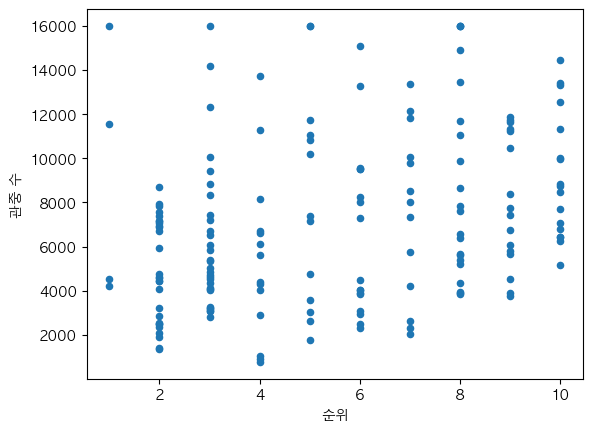

In [79]:
kiwoom_df.plot(
    x='순위',
    y='관중 수',
    kind='scatter'
)

<Axes: xlabel='총 경기수', ylabel='관중 수'>

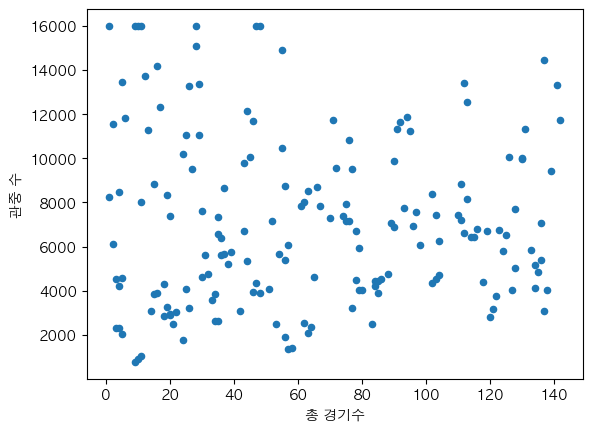

In [81]:
kiwoom_df.plot(
    x='총 경기수',
    y='관중 수',
    kind='scatter'
)

<Axes: xlabel='시작시간', ylabel='관중 수'>

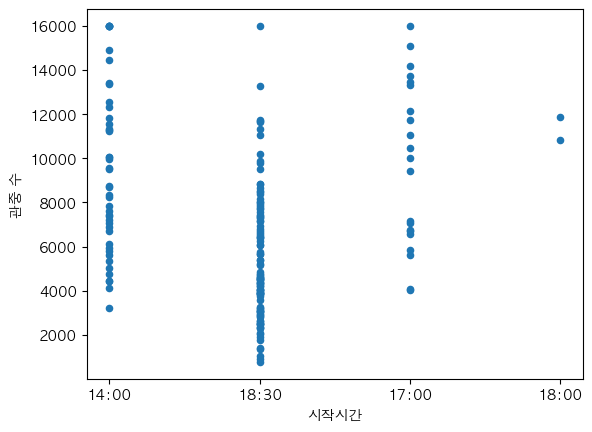

In [90]:
kiwoom_df.plot(
    x='시작시간',
    y='관중 수',
    kind='scatter'
)

<Axes: xlabel='시작시간', ylabel='관중 수'>

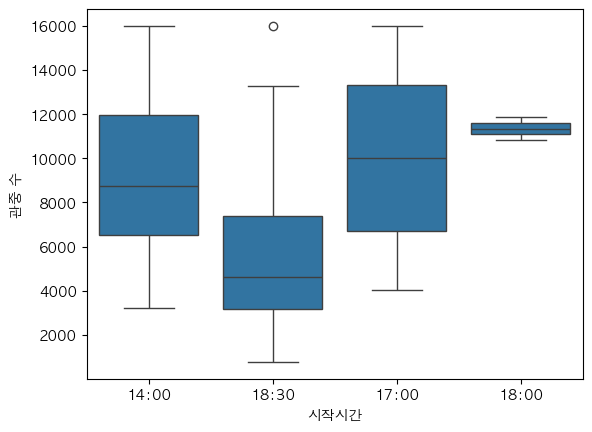

In [91]:
import seaborn as sns

sns.boxplot(
    data=kiwoom_df,
    x='시작시간',
    y='관중 수'
)

<Axes: xlabel='원정팀', ylabel='관중 수'>

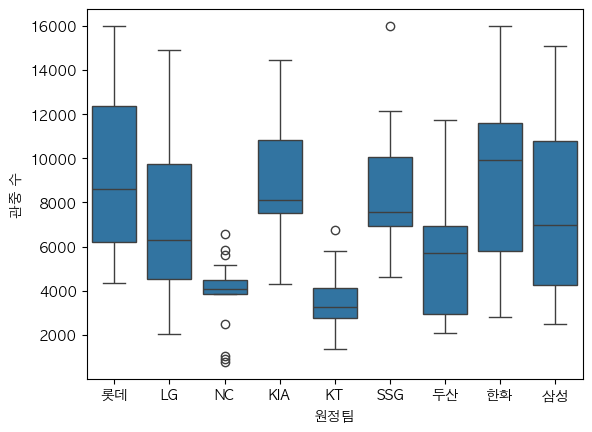

In [93]:
import seaborn as sns

sns.boxplot(
    data=kiwoom_df,
    x='원정팀',
    y='관중 수'
)

<Axes: xlabel='날짜', ylabel='관중 수'>

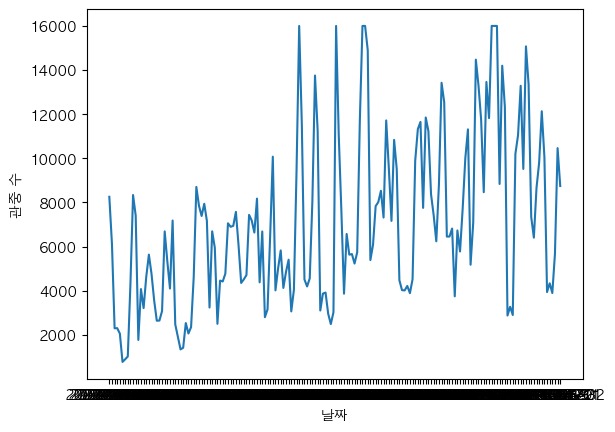

In [94]:
sns.lineplot(
    data=kiwoom_df,
    x='날짜',
    y='관중 수'
)

In [217]:
kiwoom_df

,관중 수_x,기온,습도,순위,총 경기수,승리,패배,무승부,승률,게임차,...,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,관중 수_y
날짜,,,,,,,,,,,,,,,,,,,,,
2022-04-02,8257,14.0,36.0,6,1,0,1,0,0.000,1.0,...,False,False,False,False,False,False,True,False,False,"(8234.74, 8387.0]"
2022-04-03,6115,16.0,28.0,4,2,1,1,0,0.500,1.0,...,False,False,False,False,False,False,True,False,False,"(6103.1, 6255.36]"
2022-04-05,2298,13.3,26.0,6,3,1,2,0,0.333,2.0,...,False,False,True,False,False,False,False,False,False,"(2296.6, 2448.86]"
2022-04-06,2304,14.8,35.0,7,4,1,3,0,0.250,3.0,...,False,False,True,False,False,False,False,False,False,"(2296.6, 2448.86]"
2022-04-07,2055,12.2,22.0,7,5,1,4,0,0.200,4.0,...,False,False,True,False,False,False,False,False,False,"(1992.08, 2144.34]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,4337,24.4,49.0,8,47,19,28,0,0.404,10.0,...,False,False,False,True,False,False,False,False,False,"(4275.98, 4428.24]"
2024-05-23,3897,24.1,43.0,8,48,20,28,0,0.417,9.0,...,False,False,False,True,False,False,False,False,False,"(3819.2, 3971.46]"
2024-05-31,5680,21.4,45.0,9,54,22,32,0,0.407,11.5,...,False,False,False,False,True,False,False,False,False,"(5646.32, 5798.58]"


In [221]:
kiwoom_df.drop(columns=['관중 수_x', '관중 수_y'])
kiwoom_df['관중 수_y']

날짜
2022-04-02       (8234.74, 8387.0]
2022-04-03       (6103.1, 6255.36]
2022-04-05       (2296.6, 2448.86]
2022-04-06       (2296.6, 2448.86]
2022-04-07      (1992.08, 2144.34]
                      ...         
2024-05-22      (4275.98, 4428.24]
2024-05-23       (3819.2, 3971.46]
2024-05-31      (5646.32, 5798.58]
2024-06-01    (10366.38, 10518.64]
2024-06-02      (8691.52, 8843.78]
Name: 관중 수_y, Length: 187, dtype: category
Categories (100, interval[float64, right]): [(758.774, 926.26] < (926.26, 1078.52] < (1078.52, 1230.78] < (1230.78, 1383.04] ... (15390.96, 15543.22] < (15543.22, 15695.48] < (15695.48, 15847.74] < (15847.74, 16000.0]]

In [233]:
cate_range = kiwoom_df['관중 수_y'].cat.categories

In [237]:
kiwoom_df

,관중 수_x,기온,습도,순위,총 경기수,승리,패배,무승부,승률,게임차,...,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,관중 수_y
날짜,,,,,,,,,,,,,,,,,,,,,
2022-04-02,8257,14.0,36.0,6,1,0,1,0,0.000,1.0,...,False,False,False,False,False,False,True,False,False,"(8234.74, 8387.0]"
2022-04-03,6115,16.0,28.0,4,2,1,1,0,0.500,1.0,...,False,False,False,False,False,False,True,False,False,"(6103.1, 6255.36]"
2022-04-05,2298,13.3,26.0,6,3,1,2,0,0.333,2.0,...,False,False,True,False,False,False,False,False,False,"(2296.6, 2448.86]"
2022-04-06,2304,14.8,35.0,7,4,1,3,0,0.250,3.0,...,False,False,True,False,False,False,False,False,False,"(2296.6, 2448.86]"
2022-04-07,2055,12.2,22.0,7,5,1,4,0,0.200,4.0,...,False,False,True,False,False,False,False,False,False,"(1992.08, 2144.34]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,4337,24.4,49.0,8,47,19,28,0,0.404,10.0,...,False,False,False,True,False,False,False,False,False,"(4275.98, 4428.24]"
2024-05-23,3897,24.1,43.0,8,48,20,28,0,0.417,9.0,...,False,False,False,True,False,False,False,False,False,"(3819.2, 3971.46]"
2024-05-31,5680,21.4,45.0,9,54,22,32,0,0.407,11.5,...,False,False,False,False,True,False,False,False,False,"(5646.32, 5798.58]"


,기온,습도,순위,총 경기수,승리,패배,무승부,승률,게임차,주말여부,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
날짜,,,,,,,,,,,,,,,,,,,
2022-04-02,14.0,36.0,6,1,0,1,0,0.000,1.0,True,False,False,False,False,False,False,True,False,False
2022-04-03,16.0,28.0,4,2,1,1,0,0.500,1.0,True,False,False,False,False,False,False,True,False,False
2022-04-05,13.3,26.0,6,3,1,2,0,0.333,2.0,False,False,False,True,False,False,False,False,False,False
2022-04-06,14.8,35.0,7,4,1,3,0,0.250,3.0,False,False,False,True,False,False,False,False,False,False
2022-04-07,12.2,22.0,7,5,1,4,0,0.200,4.0,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,24.4,49.0,8,47,19,28,0,0.404,10.0,False,False,False,False,True,False,False,False,False,False
2024-05-23,24.1,43.0,8,48,20,28,0,0.417,9.0,False,False,False,False,True,False,False,False,False,False
2024-05-31,21.4,45.0,9,54,22,32,0,0.407,11.5,False,False,False,False,False,True,False,False,False,False


In [248]:
test_target

날짜
2023-06-13     47
2023-04-02     71
2023-09-28     42
2022-07-09     25
2023-05-12     21
2024-03-31     73
2023-04-18     16
2022-05-08     27
2024-06-01     64
2023-09-09     61
2024-05-08     37
2023-07-30     69
2022-04-29      7
2023-08-20     78
2024-04-05    100
2023-04-01    100
2024-04-13     89
2023-08-22     38
2024-04-24     68
2024-04-16     14
2023-09-08     46
2022-05-31     22
2022-06-08      4
2023-06-15     51
2022-07-01     17
2023-04-19     21
2024-05-22     24
2022-04-02     50
2022-09-20     27
2023-10-07     83
2024-04-14     76
2023-08-18     53
2023-07-26     70
2022-08-10     24
2023-04-26     12
2022-07-03     35
2023-05-07     45
2024-05-31     33
2022-04-22     24
2023-04-15     86
2023-07-05     22
2022-06-09      5
2023-06-06     93
2022-06-01     43
2023-07-12     21
2023-06-14     48
2024-04-28     83
Name: 관중 수 범위, dtype: category
Categories (100, int64): [1 < 2 < 3 < 4 ... 97 < 98 < 99 < 100]

<Axes: xlabel='관중 수_x', ylabel='관중 수 범위'>

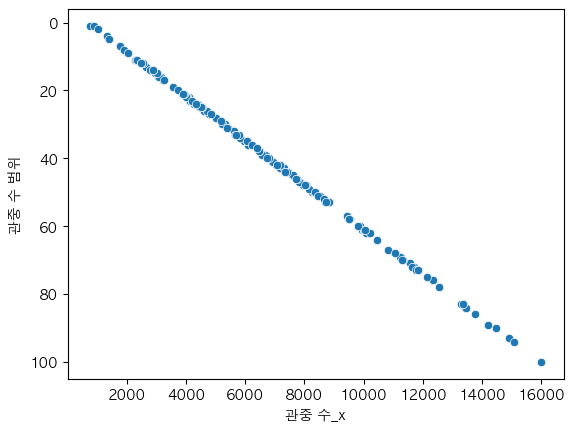

In [251]:
sns.scatterplot(
    data=kiwoom_df,
    x='관중 수_x',
    y='관중 수 범위',
)

In [247]:
pre

array([ 72, 100,  90,  24,  32,   9,  21,  32,  53,  61,  52,  73,  22,
        84, 100, 100,  53,  38,  83,  17,  61,  12,   8,  72,  39,  21,
        21,  36,  31,  73,  53,  84,  60,  25,  15,  39,  68,  72,  69,
        69,  25,   8,  31,  12,  25,  35,  94])

In [245]:
# 학습 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(kiwoom_df.drop(columns=['관중 수_x', '관중 수_y', '관중 수 범위']), kiwoom_df['관중 수 범위'])

# 데이터 학습시키고 예측
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_data, train_target)
pre = clf.predict(test_data)

# 정답률 구하기
# np.mean(pre == test_target)
from sklearn import metrics

ac_score = metrics.accuracy_score(test_target, pre)
cl_report = metrics.classification_report(test_target, pre)

print('정답률 :', ac_score)
print('리포트 :', cl_report)

정답률 : 0.10638297872340426
리포트 :               precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          21       0.33      0.33      0.33         3
          22       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00      

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

In [162]:
train_data

,기온,습도,순위,총 경기수,승리,패배,무승부,승률,게임차,주말여부,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
날짜,,,,,,,,,,,,,,,,,,,
2024-04-07,22.0,23.0,3,11,7,4,0,0.636,1.0,True,False,False,False,False,False,False,False,False,True
2023-09-03,28.6,71.0,9,124,51,70,3,0.421,21.5,True,False,True,False,False,False,False,False,False,False
2022-08-30,19.7,97.0,4,118,65,51,2,0.560,13.0,False,False,False,False,False,False,False,True,False,False
2023-08-19,33.0,56.0,10,112,45,64,3,0.413,23.0,True,False,False,False,False,False,False,True,False,False
2023-04-05,10.4,95.0,1,4,3,1,0,0.750,0.0,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-06,16.7,31.0,5,10,6,4,0,0.600,1.5,True,False,False,False,False,False,False,False,False,True
2023-07-12,28.3,75.0,9,85,38,45,2,0.458,13.0,False,False,True,False,False,False,False,False,False,False
2022-05-01,18.5,23.0,3,26,15,11,0,0.577,4.5,True,False,True,False,False,False,False,False,False,False


In [163]:
train_target

날짜
2024-04-07    16000
2023-09-03     5778
2022-08-30     4381
2023-08-19    13423
2023-04-05     4194
              ...  
2024-04-06    16000
2023-07-12     3890
2022-05-01     3213
2023-09-21     5178
2022-07-23     7057
Name: 관중 수, Length: 131, dtype: int64

In [153]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_data, train_target)

print('train score :', kn.score(train_data, train_target))
print('test score :', kn.score(test_data, test_target))

train score : 0.366412213740458
test score : 0.022727272727272728


In [155]:
from sklearn.inspection import permutation_importance

kn.fit(train_data, train_target)
result = permutation_importance(kn, train_data, train_target, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)
# print(result.importances_std)
# print(result.importances)

[0.03053435 0.23969466 0.         0.28931298 0.15572519 0.16412214
 0.         0.         0.01145038 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [169]:
from sklearn.neighbors import KNeighborsClassifier # kNN
from sklearn.model_selection import cross_val_score # 교차검증

cross_validation_score = []

# 교차검증 (10-fold)
for k in range(3,9,2) :
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        kiwoom_df.drop(columns='관중 수'),
        kiwoom_df['관중 수'],
        cv=10,
        scoring='accuracy',
    )
    cross_validation_score.append(scores.mean())


ValueError: n_splits=10 cannot be greater than the number of members in each class.

<Axes: xlabel='요일', ylabel='관중 수'>

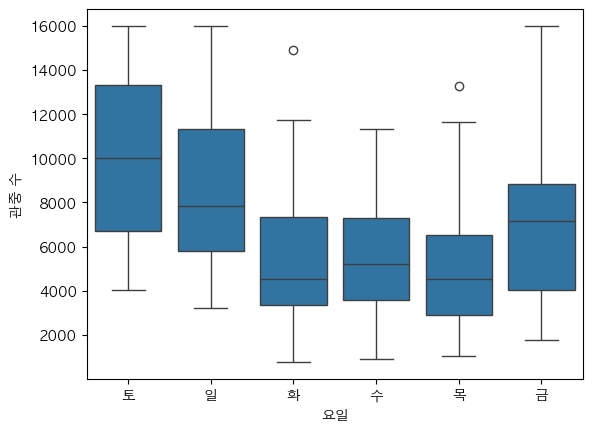

In [110]:
sns.boxplot(
    data=kiwoom_df,
    x='요일',
    y='관중 수'
)

In [218]:
category.cat.categories

IntervalIndex([   (758.774, 926.26],    (926.26, 1078.52],
                 (1078.52, 1230.78],   (1230.78, 1383.04],
                  (1383.04, 1535.3],    (1535.3, 1687.56],
                 (1687.56, 1839.82],   (1839.82, 1992.08],
                 (1992.08, 2144.34],    (2144.34, 2296.6],
                  (2296.6, 2448.86],   (2448.86, 2601.12],
                 (2601.12, 2753.38],   (2753.38, 2905.64],
                  (2905.64, 3057.9],    (3057.9, 3210.16],
                 (3210.16, 3362.42],   (3362.42, 3514.68],
                 (3514.68, 3666.94],    (3666.94, 3819.2],
                  (3819.2, 3971.46],   (3971.46, 4123.72],
                 (4123.72, 4275.98],   (4275.98, 4428.24],
                  (4428.24, 4580.5],    (4580.5, 4732.76],
                 (4732.76, 4885.02],   (4885.02, 5037.28],
                 (5037.28, 5189.54],    (5189.54, 5341.8],
                  (5341.8, 5494.06],   (5494.06, 5646.32],
                 (5646.32, 5798.58],   (5798.58, 5950.84

In [212]:
kiwoom_df = pd.merge(kiwoom_df, category, left_index=True, right_index=True)

In [180]:
import numpy as np
np.array(kiwoom_df['관중 수'])

array([[ 8257],
       [ 6115],
       [ 2298],
       [ 2304],
       [ 2055],
       [  774],
       [  893],
       [ 1020],
       [ 4289],
       [ 8338],
       [ 7406],
       [ 1770],
       [ 4075],
       [ 3213],
       [ 4627],
       [ 5637],
       [ 4765],
       [ 3564],
       [ 2641],
       [ 2649],
       [ 3080],
       [ 6689],
       [ 5330],
       [ 4100],
       [ 7181],
       [ 2477],
       [ 1904],
       [ 1342],
       [ 1414],
       [ 2536],
       [ 2062],
       [ 2349],
       [ 4608],
       [ 8705],
       [ 7849],
       [ 7388],
       [ 7941],
       [ 7165],
       [ 3238],
       [ 6692],
       [ 5952],
       [ 2500],
       [ 4459],
       [ 4419],
       [ 4776],
       [ 7057],
       [ 6897],
       [ 6941],
       [ 7573],
       [ 6064],
       [ 4352],
       [ 4515],
       [ 4710],
       [ 7439],
       [ 7183],
       [ 6637],
       [ 8175],
       [ 4381],
       [ 6685],
       [ 2799],
       [ 3156],
       [ 6505],
       [

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

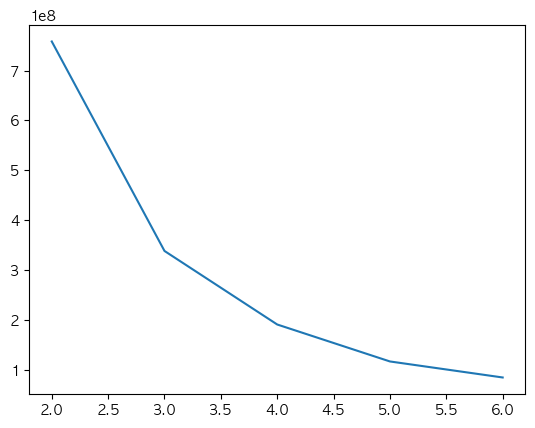

In [181]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2,7) :
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(np.array(kiwoom_df['관중 수']).reshape(-1, 1))
    inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)

날짜
2022-04-02     8257
2022-04-03     6115
2022-04-05     2298
2022-04-06     2304
2022-04-07     2055
              ...  
2024-05-22     4337
2024-05-23     3897
2024-05-31     5680
2024-06-01    10462
2024-06-02     8745
Name: 관중 수_x, Length: 187, dtype: int64

,관중 수_x,기온,습도,순위,총 경기수,승리,패배,무승부,승률,게임차,...,KT,LG,NC,SSG,두산,롯데,삼성,한화,관중 수_y,관중 수 범위
날짜,,,,,,,,,,,,,,,,,,,,,
2022-04-02,8257,14.0,36.0,6,1,0,1,0,0.000,1.0,...,False,False,False,False,False,True,False,False,"(8234.74, 8387.0]",50
2022-04-03,6115,16.0,28.0,4,2,1,1,0,0.500,1.0,...,False,False,False,False,False,True,False,False,"(6103.1, 6255.36]",36
2022-04-05,2298,13.3,26.0,6,3,1,2,0,0.333,2.0,...,False,True,False,False,False,False,False,False,"(2296.6, 2448.86]",11
2022-04-06,2304,14.8,35.0,7,4,1,3,0,0.250,3.0,...,False,True,False,False,False,False,False,False,"(2296.6, 2448.86]",11
2022-04-07,2055,12.2,22.0,7,5,1,4,0,0.200,4.0,...,False,True,False,False,False,False,False,False,"(1992.08, 2144.34]",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,4337,24.4,49.0,8,47,19,28,0,0.404,10.0,...,False,False,True,False,False,False,False,False,"(4275.98, 4428.24]",24
2024-05-23,3897,24.1,43.0,8,48,20,28,0,0.417,9.0,...,False,False,True,False,False,False,False,False,"(3819.2, 3971.46]",21
2024-05-31,5680,21.4,45.0,9,54,22,32,0,0.407,11.5,...,False,False,False,True,False,False,False,False,"(5646.32, 5798.58]",33


In [241]:
kiwoom_df['관중 수 범위'] = pd.cut(kiwoom_df['관중 수_x'], bins=100, labels=range(1,101))

In [120]:
kiwoom_df['주말여부'] = (kiwoom_df['요일'] == '토') | (kiwoom_df['요일'] == '일')

In [123]:
kiwoom_df.drop(columns='요일', inplace=True)

In [136]:
kiwoom_df = pd.merge(kiwoom_df, pd.get_dummies(kiwoom_df['원정팀']), left_index=True, right_index=True)

In [140]:
kiwoom_df.drop(columns='원정팀', inplace=True)

In [144]:
kiwoom_df.drop(columns='시작시간', inplace=True)

In [151]:
kiwoom_df.drop(columns='연속 승패 현황', inplace=True)

In [146]:
kiwoom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 2022-04-02 to 2024-06-02
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관중 수      175 non-null    int64  
 1   기온        175 non-null    float64
 2   습도        175 non-null    float64
 3   순위        175 non-null    int64  
 4   총 경기수     175 non-null    int64  
 5   승리        175 non-null    int64  
 6   패배        175 non-null    int64  
 7   무승부       175 non-null    int64  
 8   승률        175 non-null    float64
 9   게임차       175 non-null    float64
 10  연속 승패 현황  175 non-null    object 
 11  주말여부      175 non-null    bool   
 12  KIA       175 non-null    bool   
 13  KT        175 non-null    bool   
 14  LG        175 non-null    bool   
 15  NC        175 non-null    bool   
 16  SSG       175 non-null    bool   
 17  두산        175 non-null    bool   
 18  롯데        175 non-null    bool   
 19  삼성        175 non-null    bool   
 20  한화        175 non-nul

In [133]:
pd.get_dummies(kiwoom_df['원정팀'])

,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
날짜,,,,,,,,,
2022-04-02,False,False,False,False,False,False,True,False,False
2022-04-03,False,False,False,False,False,False,True,False,False
2022-04-05,False,False,True,False,False,False,False,False,False
2022-04-06,False,False,True,False,False,False,False,False,False
2022-04-07,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2024-05-22,False,False,False,True,False,False,False,False,False
2024-05-23,False,False,False,True,False,False,False,False,False
2024-05-31,False,False,False,False,True,False,False,False,False


<Axes: xlabel='연속 승패 현황', ylabel='관중 수'>

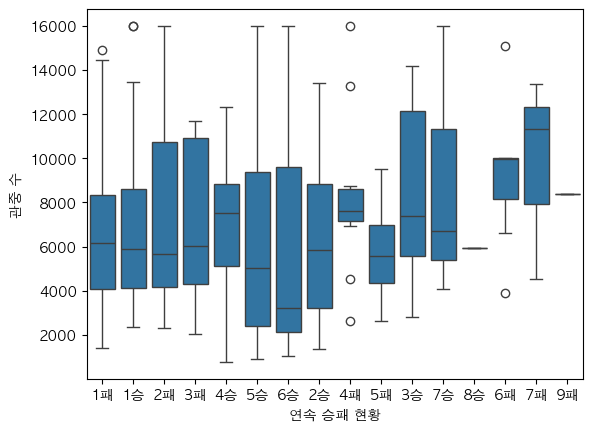

In [150]:
sns.boxplot(
    data=kiwoom_df,
    x='연속 승패 현황',
    y='관중 수'
)